contoh kasus yang pemecahannya harus mengidentifikasi pola atau segmen sehingga bisa menggunakan model clustering:

- Segmentasi pasar: memahami karakteristik konsumen atau calon konsumen, misalnya berdasarkan usia dan pengeluaran¹².
- Segmentasi gambar: untuk aplikasi pengenalan objek¹².
- Social Network Analysis (SNA): mengelompokkan tweet atau profil berdasarkan opini mereka terhadap suatu kasus¹.
- Taksonomi: dalam biologi, analisis klaster adalah alat yang penting untuk klasifikasi organisme¹.
- Medis: identifikasi pasien yang memiliki penyakit dengan penyebab yang sama atau pasien yang harus menerima pengobatan yang sama¹.
- Pengambilan informasi: pengelompokan dokumen³.
- Penggunaan lahan: identifikasi area penggunaan lahan yang serupa dalam database observasi bumi³.
- Cluster sampling: metode pengambilan sampel yang membagi populasi menjadi kelompok-kelompok yang homogen dan memilih sebagian kelompok tersebut secara acak untuk dijadikan sampel⁴.

(1) Analisis Cluster: Pengertian,Contoh dan Metodenya - GEOSPASIALIS. https://geospasialis.com/analisis-cluster/.

(2) K Means Clustering : Contoh Sederhana Penerapan Algoritma K-Means .... https://www.alfasoleh.com/2019/11/k-means-clustering-contoh-sederhana.html.

(3) Algoritma Clustering Data Mining: Metode Partisi - Flin Setyadi. https://flinsetyadi.com/algorimta-clustering-dalam-data-mining-metode-partisi/.

(4) Pengertian Cluster Sampling Lengkap dengan Cara dan Contohnya - 99.co. https://www.99.co/id/panduan/cluster-sampling-adalah/.

kmean dengan menggunakan data segmentasi pasar yang bersumber dari [sini](https://www.niagahoster.co.id/blog/segmentasi-pasar-adalah/).


In [2]:
# Mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Membaca data dari file csv
data = pd.read_csv("https://raw.githubusercontent.com/SooyeonWon/customer_analytics_fmcg/main/segmentation%20data.csv")

# Menampilkan lima baris pertama data
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


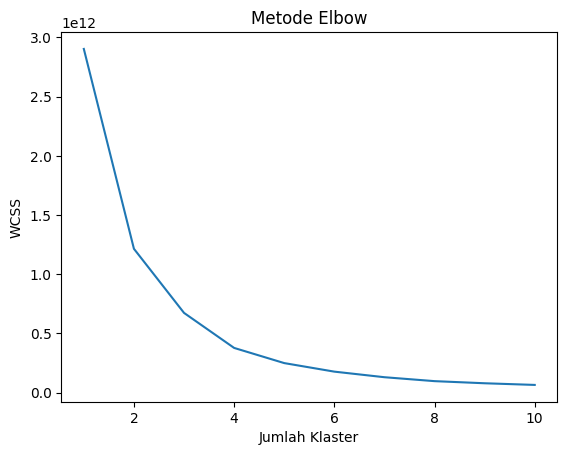

In [35]:
import warnings
warnings.filterwarnings("ignore")
# Memilih kolom usia dan income sebagai fitur untuk klastering
X = data.iloc[:, [3, 5]].values

# Menentukan jumlah klaster yang optimal dengan metode elbow
wcss = [] # wcss adalah within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.show()

cara mencari nilai k optimum dengan elbow
* cari titik yang membentuk siku (elbow) pada grafik tersebut. Titik siku adalah titik di mana terjadi penurunan signifikan antara dua titik k dan diikuti oleh nilai yang relatif konstan.
* Pilih nilai k yang sesuai dengan titik siku sebagai jumlah cluster yang optimal untuk data Anda.


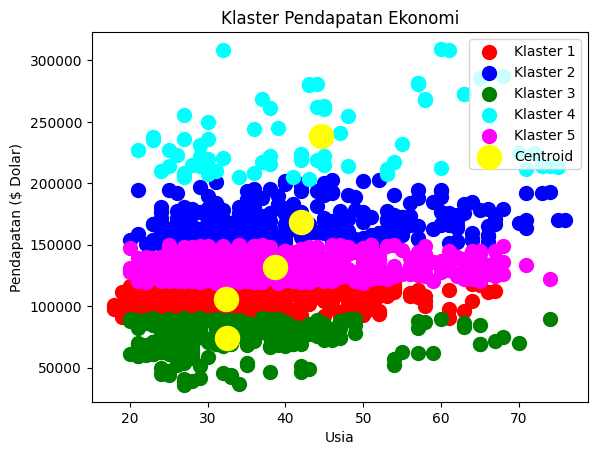

In [39]:
# Dari grafik, dapat dilihat bahwa jumlah klaster yang optimal adalah 5 karena pada k=5 ke kanan grafiknya cenderung relatif konstan sedangkan sebelum k=5 masih menurun secara signifikan
# Membuat model kmeans dengan 5 klaster
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Memvisualisasikan hasil klastering
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Klaster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Klaster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Klaster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Klaster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Klaster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Klaster Pendapatan Ekonomi')
plt.xlabel('Usia')
plt.ylabel('Pendapatan ($ Dolar)')
plt.legend()
plt.show()

In [40]:
# Memberi label pada setiap klaster berdasarkan karakteristiknya
data['Klaster'] = y_kmeans
data['Klaster'] = data['Klaster'].map({0: 'Menengah ke bawah', 1: 'Menengah ke atas', 2: 'Miskin', 3: 'Kaya', 4: 'Menengah'})
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Klaster
0,100000001,0,0,67,2,124670,1,2,Menengah
1,100000002,1,1,22,1,150773,1,2,Menengah ke atas
2,100000003,0,0,49,1,89210,0,0,Miskin
3,100000004,0,0,45,1,171565,1,1,Menengah ke atas
4,100000005,0,0,53,1,149031,1,1,Menengah


In [41]:
# Menampilkan ringkasan statistik untuk setiap klaster
data.groupby('Klaster').describe()

ID                                                       \
                   count          mean         std          min           25%   
Klaster                                                                         
Kaya                73.0  1.000006e+08  352.990409  100000019.0  1.000003e+08   
Menengah           561.0  1.000009e+08  532.210222  100000001.0  1.000005e+08   
Menengah ke atas   280.0  1.000007e+08  397.519190  100000002.0  1.000004e+08   
Menengah ke bawah  720.0  1.000011e+08  592.939915  100000011.0  1.000005e+08   
Miskin             366.0  1.000013e+08  615.739531  100000003.0  1.000007e+08   

                                                             Sex            \
                           50%           75%          max  count      mean   
Klaster                                                                      
Kaya               100000638.0  1.000010e+08  100001098.0   73.0  0.246575   
Menengah           100000919.0  1.000013e+08  100001996.0  561.0  0.397504   
Menengah ke atas   100000816.5  1.000011e+08  100001510.0  280.0  0.292857   
Menengah ke bawah  100001210.5  1.000016e+08  100001999.0  720.0  0.545833   
Miskin             100001518.5  1.000018e+08  100002000.0  366.0  0.540984   

                   ... Occupation      Settlement size                      \
                   ...        75%  max           count      mean       std   
Klaster            ...                                                       
Kaya               ...        2.0  2.0            73.0  1.520548  0.603453   
Menengah           ...        1.0  2.0           561.0  0.948307  0.818863   
Menengah ke atas   ...        2.0  2.0           280.0  1.310714  0.655738   
Menengah ke bawah  ...        1.0  2.0           720.0  0.625000  0.768603   
Miskin             ...        0.0  1.0           366.0  0.049180  0.282430   

                                            
                   min  25%  50%  75%  max  
Klaster                                     
Kaya               0.0  1.0  2.0  2.0  2.0  
Menengah           0.0  0.0  1.0  2.0  2.0  
Menengah ke atas   0.0  1.0  1.0  2.0  2.0  
Menengah ke bawah  0.0  0.0  0.0  1.0  2.0  
Miskin             0.0  0.0  0.0  0.0  2.0  

[5 rows x 64 columns]

(1) Segmentasi Pasar: Tujuan, Manfaat, Syarat, dan Jenisnya - Niagahoster. https://www.niagahoster.co.id/blog/segmentasi-pasar-adalah/.

(2) 9 Contoh Segmentasi Pasar Berbagai Produk (2022) - Blog Komerce. https://komerce.id/blog/contoh-segmentasi-pasar/.

(3) Segmentasi Adalah: Pengertian, Jenis, dan Tujuan | DailySocial.id. https://dailysocial.id/post/segmentasi-adalah.

(4) Contoh Segmentasi Pasar Demografis dan Geografis - Tirto.ID. https://tirto.id/contoh-segmentasi-pasar-demografis-dan-geografis-gPpd.

(5) Segmentasi Pasar Menggunakan K-Means | by alivia zahra | Medium. https://medium.com/@zahraalivia5/segmentasi-pasar-menggunakan-k-means-1e4ae4b9eb59.

(6) Penerapan Algoritma K-Means untuk Segmentasi Konsumen ... - ResearchGate. https://www.researchgate.net/publication/338748190_Penerapan_Algoritma_K-Means_untuk_Segmentasi_Konsumen_Menggunakan_R/fulltext/5e284bdf299bf15216737dff/Penerapan-Algoritma-K-Means-untuk-Segmentasi-Konsumen-Menggunakan-R.pdf.

(7) Segmentasi Pelanggan Toko Purnama dengan Algoritma K-Means dan ... - Neliti. https://media.neliti.com/media/publications/467607-none-4aad72d8.pdf.
(8) Analisis Segmentasi Pelanggan - Medium. https://amaretha.medium.com/analisis-segmentasi-pelanggan-dengan-k-means-clustering-c4d6301e9b65.

(9) github.com. https://github.com/elsieseda/forest-analysis/tree/5440eab027ae17bb0813238dcd716981abcbea5f/clustering.py.

(10) github.com. https://github.com/Pooja-Lokesh/Machine-Learning/tree/d071873d2e4e7230142f6b0dcea779b94c6293b8/Clustering%2FK-Means%2Fk_means_clustering.py.

(11) github.com. https://github.com/ilyasmahfud/K-means/tree/e27303afb4f38bbc3c8efd1e9b66d3a02d563d57/K%20means%20DBD%20Jawa%20Tengah.md.